In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.head(1)

# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,dlf the primus,sector 82a,3.5,13430.0,2606.0,Carpet area: 2606 (242.11 sq.m.),5,5.0,3.0,study room,14.0,North-East,1 to 5 Year Old,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


### 1. areawithtype

In [6]:
df.sample(5)[['price' , 'area' , 'areaWithType']]

,price,area,areaWithType
598,0.60,735.0,Super Built up area 735(68.28 sq.m.)
949,0.75,1660.0,Super Built up area 1660(154.22 sq.m.)
3372,3.85,2341.0,Super Built up area 2341(217.49 sq.m.)
1821,0.98,1647.0,Super Built up area 1647(153.01 sq.m.)
3278,0.41,495.0,Carpet area: 501 (46.54 sq.m.)


In [7]:
# This function extracts the Super Built up area

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area

def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price' , 'property_type' , 'area' , 'areaWithType' , 'super_built_up_area' , 'built_up_area' , 'carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1034,1.38,flat,1538.0,Carpet area: 1538 (142.88 sq.m.),NaN,NaN,1538.0
1056,0.25,flat,357.0,Super Built up area 414(38.46 sq.m.)Carpet area: 357 sq.ft. (33.17 sq.m.),414.0,NaN,357.0
1467,1.55,flat,2100.0,Super Built up area 2100(195.1 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1900 sq.ft. (176.52 sq.m.),2100.0,2000.0,1900.0
465,1.90,flat,2144.0,Super Built up area 2200(204.39 sq.m.),2200.0,NaN,NaN
729,0.35,flat,545.0,Carpet area: 545 (50.63 sq.m.),NaN,NaN,545.0


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price' , 'property_type' , 'area' , 'areaWithType' , 'super_built_up_area' , 'built_up_area' , 'carpet_area' ]].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price' , 'property_type' , 'area' , 'areaWithType' , 'super_built_up_area' , 'built_up_area' , 'carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
12,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
16,0.70,house,684.0,Plot area 684(63.55 sq.m.),NaN,NaN,NaN
30,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
48,1.25,house,82781.0,Plot area 115(7692.86 sq.m.),NaN,NaN,NaN
53,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  94
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price' , 'property_type' , 'areaWithType' , 'super_built_up_area' , 'built_up_area' , 'carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area
12,4.50,house,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
16,0.70,house,Plot area 684(63.55 sq.m.),NaN,NaN,NaN
30,6.50,house,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
48,1.25,house,Plot area 115(7692.86 sq.m.),NaN,NaN,NaN
53,5.60,house,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price' , 'property_type' , 'areaWithType' , 'super_built_up_area' , 'built_up_area' , 'carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column

def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area
12,4.50,house,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
16,0.70,house,Plot area 684(63.55 sq.m.),NaN,684.00,NaN
30,6.50,house,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
48,1.25,house,Plot area 115(7692.86 sq.m.),NaN,115.00,NaN
53,5.60,house,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
54,6.50,house,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
74,0.50,house,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
80,5.50,house,Plot area 265(221.57 sq.m.),NaN,265.00,NaN
91,3.50,house,Plot area 180(150.5 sq.m.),NaN,180.00,NaN
99,20.00,house,Plot area 500(418.06 sq.m.),NaN,500.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [24]:
import numpy as np

def convert_scale(row):
    if 'area' not in row or 'built_up_area' not in row:
        return row['built_up_area']
    
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area'] / row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area'] / row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

# Apply the convert_scale function to the DataFrame
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale, axis=1)


In [25]:
all_nan_df

,price,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area
12,4.50,house,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
16,0.70,house,Plot area 684(63.55 sq.m.),NaN,684.00,NaN
30,6.50,house,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
48,1.25,house,Plot area 115(7692.86 sq.m.),NaN,115.00,NaN
53,5.60,house,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
54,6.50,house,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
74,0.50,house,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
80,5.50,house,Plot area 265(221.57 sq.m.),NaN,265.00,NaN
91,3.50,house,Plot area 180(150.5 sq.m.),NaN,180.00,NaN
99,20.00,house,Plot area 500(418.06 sq.m.),NaN,500.00,NaN


In [26]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,dlf the primus,sector 82a,3.50,13430.0,2606.0,Carpet area: 2606 (242.11 sq.m.),5,5.0,3.0,study room,14.0,North-East,1 to 5 Year Old,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2606.0
1,flat,sbr apartment,manesar,0.68,4456.0,1526.0,Built Up area: 1526 (141.77 sq.m.),3,3.0,3.0,not available,2.0,NaN,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1526.0,NaN
2,flat,malibu towne,sector 47,2.40,10000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3.0,NaN,not available,0.0,West,5 to 10 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Sukhmani Hospital Pvt. Ltd', 'Meher Clinic', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bones Clinic - Orthopaedics', 'Samvit Health Care', 'Medanta', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dispencery', 'Airforce Hospital', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Haldiram', 'KFC', ""Domino's Pizza"", ""Nirula's"", 'India', 'Nook', 'Starbucks', 'Delhi Public School Primary Section', 'Kamla International', 'Kendriya Vidyalaya No.2 Sohna Road', 'Manav Rachna School', 'Amity Global School', 'Gurugram University', 'CR Model Public School', 'Manav Rachna Swimming Pool']","['1 Water Purifier', '3 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '3 Light', '3 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Sofa', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No TV', 'No Washing Machine']","['Maintenance Staff', 'Swimming Pool', 'Park']",NaN,NaN,2400.0
3,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Built Up area: 1385 (128.67 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2.0,3.0,not available,17.0,NaN,undefined,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'K. R. Mangalam University', 'Vidya Niketan Sr Sec School', 'Sanjivani Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,1385.0,1000.0
4,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2.0,3.0,others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 

In [27]:
# update the original dataframe

df.update(all_nan_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  94
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [29]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,dlf the primus,sector 82a,3.50,13430.0,2606.0,Carpet area: 2606 (242.11 sq.m.),5,5.0,3.0,study room,14.0,North-East,1 to 5 Year Old,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2606.0
1,flat,sbr apartment,manesar,0.68,4456.0,1526.0,Built Up area: 1526 (141.77 sq.m.),3,3.0,3.0,not available,2.0,NaN,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1526.0,NaN
2,flat,malibu towne,sector 47,2.40,10000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3.0,NaN,not available,0.0,West,5 to 10 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Sukhmani Hospital Pvt. Ltd', 'Meher Clinic', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bones Clinic - Orthopaedics', 'Samvit Health Care', 'Medanta', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dispencery', 'Airforce Hospital', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Haldiram', 'KFC', ""Domino's Pizza"", ""Nirula's"", 'India', 'Nook', 'Starbucks', 'Delhi Public School Primary Section', 'Kamla International', 'Kendriya Vidyalaya No.2 Sohna Road', 'Manav Rachna School', 'Amity Global School', 'Gurugram University', 'CR Model Public School', 'Manav Rachna Swimming Pool']","['1 Water Purifier', '3 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '3 Light', '3 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Sofa', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No TV', 'No Washing Machine']","['Maintenance Staff', 'Swimming Pool', 'Park']",NaN,NaN,2400.0
3,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Built Up area: 1385 (128.67 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2.0,3.0,not available,17.0,NaN,undefined,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'K. R. Mangalam University', 'Vidya Niketan Sr Sec School', 'Sanjivani Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,1385.0,1000.0
4,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2.0,3.0,others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 

### 2. AdditionalRoom

In [30]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [31]:
# additional rooms

# list of new columns to be treated

new_cols = ['study room' , 'servant room' , 'store room' , 'pooja room' , 'others']

# populate the new columns based on the "additionalRoom" column

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [32]:
df.sample(5)[['additionalRoom' , 'study room' , 'servant room' , 'store room' , 'pooja room' , 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3568,study room,1,0,0,0,0
2110,not available,0,0,0,0,0
204,"study room,servant room",1,1,0,0,0
170,"servant room,pooja room,store room",0,1,1,1,0
232,not available,0,0,0,0,0


In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf the primus,sector 82a,3.50,13430.0,2606.0,Carpet area: 2606 (242.11 sq.m.),5,5.0,3.0,study room,14.0,North-East,1 to 5 Year Old,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2606.0,1,0,0,0,0
1,flat,sbr apartment,manesar,0.68,4456.0,1526.0,Built Up area: 1526 (141.77 sq.m.),3,3.0,3.0,not available,2.0,NaN,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1526.0,NaN,0,0,0,0,0
2,flat,malibu towne,sector 47,2.40,10000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3.0,NaN,not available,0.0,West,5 to 10 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Sukhmani Hospital Pvt. Ltd', 'Meher Clinic', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bones Clinic - Orthopaedics', 'Samvit Health Care', 'Medanta', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dispencery', 'Airforce Hospital', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Haldiram', 'KFC', ""Domino's Pizza"", ""Nirula's"", 'India', 'Nook', 'Starbucks', 'Delhi Public School Primary Section', 'Kamla International', 'Kendriya Vidyalaya No.2 Sohna Road', 'Manav Rachna School', 'Amity Global School', 'Gurugram University', 'CR Model Public School', 'Manav Rachna Swimming Pool']","['1 Water Purifier', '3 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '3 Light', '3 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Sofa', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No TV', 'No Washing Machine']","['Maintenance Staff', 'Swimming Pool', 'Park']",NaN,NaN,2400.0,0,0,0,0,0
3,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Built Up area: 1385 (128.67 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2.0,3.0,not available,17.0,NaN,undefined,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'K. R. Mangalam University', 'Vidya Niketan Sr Sec School', 'Sanjivani Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,1385.0,1000.0,0,0,0,0,0
4,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2.0,3.0,others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",Na

### 3. agePossession

In [34]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
By 2025                  4
Oct 2023                 4
Aug 2024                 4
Sep 2023                 4
Jul 2024                 4
Feb 2024                 3
Nov 2024                 3
Jan 2025                 3
May 2024                 3
Apr 2026                 2
Mar 2025                 2
Jul 2025                 2
By 2027                  2
Jun 2027                 2
Dec 2026                 2
Oct 2025                 2
Jul 2027                 2
Aug 2025                 2
J

In [35]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [36]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [37]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [38]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf the primus,sector 82a,3.50,13430.0,2606.0,Carpet area: 2606 (242.11 sq.m.),5,5.0,3.0,study room,14.0,North-East,Relatively New,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2606.0,1,0,0,0,0
1,flat,sbr apartment,manesar,0.68,4456.0,1526.0,Built Up area: 1526 (141.77 sq.m.),3,3.0,3.0,not available,2.0,NaN,Moderately Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1526.0,NaN,0,0,0,0,0
2,flat,malibu towne,sector 47,2.40,10000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3.0,NaN,not available,0.0,West,Moderately Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Sukhmani Hospital Pvt. Ltd', 'Meher Clinic', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bones Clinic - Orthopaedics', 'Samvit Health Care', 'Medanta', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dispencery', 'Airforce Hospital', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Haldiram', 'KFC', ""Domino's Pizza"", ""Nirula's"", 'India', 'Nook', 'Starbucks', 'Delhi Public School Primary Section', 'Kamla International', 'Kendriya Vidyalaya No.2 Sohna Road', 'Manav Rachna School', 'Amity Global School', 'Gurugram University', 'CR Model Public School', 'Manav Rachna Swimming Pool']","['1 Water Purifier', '3 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '3 Light', '3 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Sofa', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No TV', 'No Washing Machine']","['Maintenance Staff', 'Swimming Pool', 'Park']",NaN,NaN,2400.0,0,0,0,0,0
3,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Built Up area: 1385 (128.67 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2.0,3.0,not available,17.0,NaN,Undefined,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'K. R. Mangalam University', 'Vidya Niketan Sr Sec School', 'Sanjivani Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,1385.0,1000.0,0,0,0,0,0
4,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2.0,3.0,others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['

### 4. furnishedDetails

In [39]:
df.sample(5)[['furnishDetails' , 'features']]

,furnishDetails,features
1586,"['1 Exhaust Fan', '7 Geyser', '12 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3711,"['1 Stove', '4 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2564,[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
460,NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1426,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [40]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [41]:
furnishings_df.shape

(3803, 19)

In [42]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\harap\AppData\Local\Temp\ipykernel_13000\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [43]:
furnishings_df.sample(5)

,Sofa,Fan,Bed,Stove,Wardrobe,Light,Dining Table,Water Purifier,TV,Exhaust Fan,Microwave,Curtains,Fridge,Washing Machine,Geyser,Chimney,Modular Kitchen,AC
2436,0,13,0,0,5,32,0,1,0,1,0,0,0,0,6,1,0,0
3010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2757,0,1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,0,1
938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [46]:
wcss_reduced = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\harap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


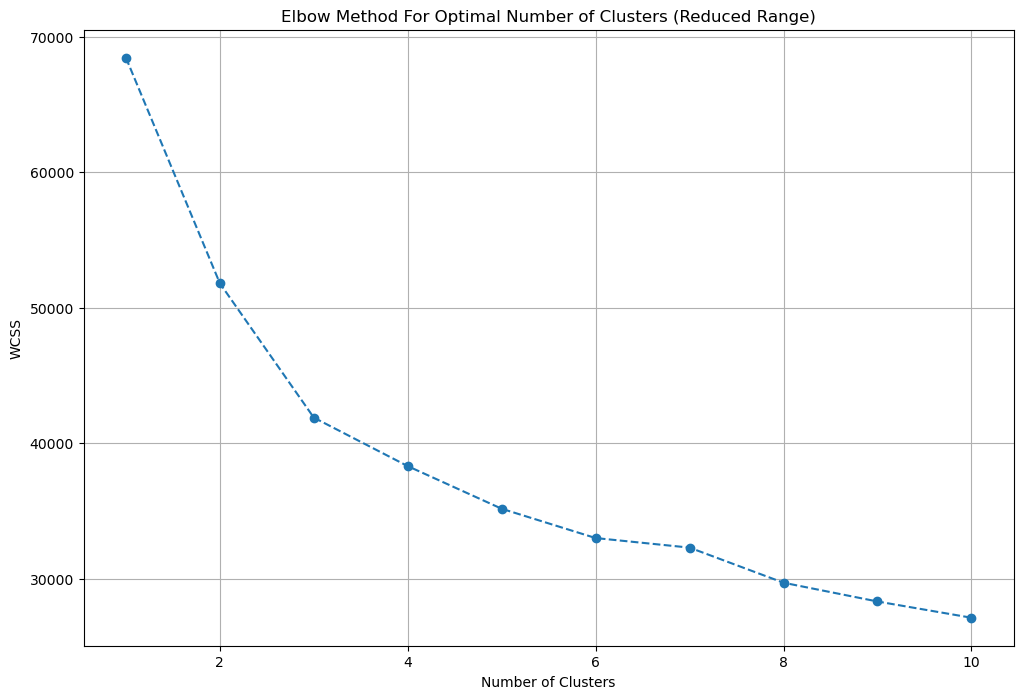

In [47]:
# plot the results

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [48]:
n_clusters = 3

# fit the KMeans model

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# predict the clusters assignments for each rows

cluster_assignments = kmeans.predict(scaled_data)

In [49]:
df = df.iloc[:,:-18]

In [50]:
df['furnishing_type'] = cluster_assignments

In [51]:
df.sample(5)[['furnishDetails' , 'furnishing_type']]

# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3576,NaN,0
1045,"['12 Fan', '1 Fridge', '1 Exhaust Fan', '12 Geyser', '12 Light', '1 Modular Kitchen', '1 Curtains', '12 AC', '12 TV', '12 Wardrobe', '12 Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",1
2372,"['2 Wardrobe', '1 Water Purifier', '2 Fan', '1 Fridge', '1 Sofa', '1 Exhaust Fan', '2 Geyser', '3 Light', '2 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Stove', 'No TV', 'No Washing Machine']",1
999,"['7 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '2 AC', '1 Chimney', '6 Curtains', '1 Modular Kitchen', '4 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
309,"['1 Wardrobe', '2 Fan', '1 Exhaust Fan', '3 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


In [52]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
960,NaN,0
931,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
3734,"['3 Fan', '1 Exhaust Fan', '8 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
970,"['5 Fan', '1 Exhaust Fan', '1 Geyser', '8 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
3802,"['4 Wardrobe', '9 Fan', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


In [53]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,dlf the primus,sector 82a,3.50,13430.0,2606.0,Carpet area: 2606 (242.11 sq.m.),5,5.0,3.0,study room,14.0,North-East,Relatively New,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2606.0,1,0,0,0,0,1
1,flat,sbr apartment,manesar,0.68,4456.0,1526.0,Built Up area: 1526 (141.77 sq.m.),3,3.0,3.0,not available,2.0,NaN,Moderately Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1526.0,NaN,0,0,0,0,0,0
2,flat,malibu towne,sector 47,2.40,10000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3.0,NaN,not available,0.0,West,Moderately Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Sukhmani Hospital Pvt. Ltd', 'Meher Clinic', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bones Clinic - Orthopaedics', 'Samvit Health Care', 'Medanta', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dispencery', 'Airforce Hospital', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Haldiram', 'KFC', ""Domino's Pizza"", ""Nirula's"", 'India', 'Nook', 'Starbucks', 'Delhi Public School Primary Section', 'Kamla International', 'Kendriya Vidyalaya No.2 Sohna Road', 'Manav Rachna School', 'Amity Global School', 'Gurugram University', 'CR Model Public School', 'Manav Rachna Swimming Pool']","['1 Water Purifier', '3 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '3 Light', '3 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Sofa', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No TV', 'No Washing Machine']","['Maintenance Staff', 'Swimming Pool', 'Park']",NaN,NaN,2400.0,0,0,0,0,0,2
3,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Built Up area: 1385 (128.67 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2.0,3.0,not available,17.0,NaN,Undefined,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'K. R. Mangalam University', 'Vidya Niketan Sr Sec School', 'Sanjivani Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,1385.0,1000.0,0,0,0,0,0,0
4,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2.0,3.0,others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Tr

### 5. features

In [54]:
df[['society' , 'features']].sample(5)

,society,features
2130,sare homes,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"
3623,trisara our homes 3,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
315,pioneer araya,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
376,dlf the primus,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
676,parsvnath green ville,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [55]:
df['features'].isnull().sum()

635

In [56]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [57]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [58]:
temp_df = df[df['features'].isnull()]

In [59]:
temp_df.shape

(635, 26)

In [60]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [61]:
df.loc[temp_df.index,'features'] = x.values

In [62]:
df['features'].isnull().sum()

481

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [64]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [65]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3363,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2484,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1408,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
3262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [66]:
features_binary_df.shape

(3803, 130)

In [67]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\harap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


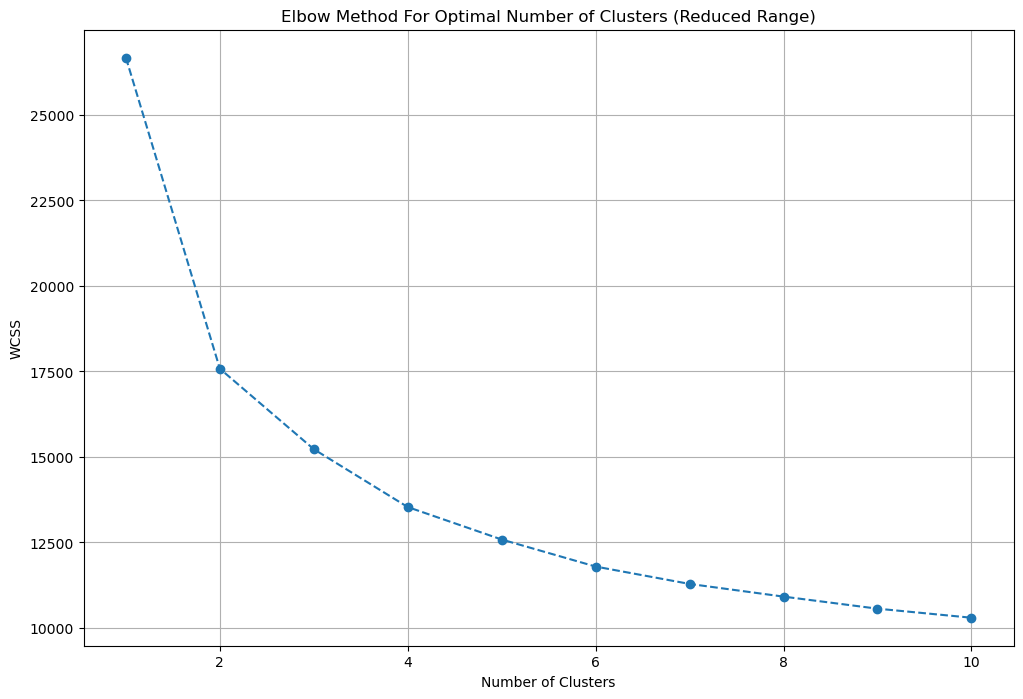

In [68]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [69]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [70]:
df['luxury_score'] = luxury_score

In [71]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,dlf the primus,sector 82a,3.50,13430.0,2606.0,Carpet area: 2606 (242.11 sq.m.),5,5.0,3.0,study room,14.0,North-East,Relatively New,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2606.0,1,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,flat,sbr apartment,manesar,0.68,4456.0,1526.0,Built Up area: 1526 (141.77 sq.m.),3,3.0,3.0,not available,2.0,NaN,Moderately Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1526.0,NaN,0,0,0,0,0,0,[],0
2,flat,malibu towne,sector 47,2.40,10000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3.0,NaN,not available,0.0,West,Moderately Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Sukhmani Hospital Pvt. Ltd', 'Meher Clinic', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bones Clinic - Orthopaedics', 'Samvit Health Care', 'Medanta', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dispencery', 'Airforce Hospital', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Haldiram', 'KFC', ""Domino's Pizza"", ""Nirula's"", 'India', 'Nook', 'Starbucks', 'Delhi Public School Primary Section', 'Kamla International', 'Kendriya Vidyalaya No.2 Sohna Road', 'Manav Rachna School', 'Amity Global School', 'Gurugram University', 'CR Model Public School', 'Manav Rachna Swimming Pool']","['1 Water Purifier', '3 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '3 Light', '3 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Sofa', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No TV', 'No Washing Machine']","['Maintenance Staff', 'Swimming Pool', 'Park']",NaN,NaN,2400.0,0,0,0,0,0,2,"[Maintenance Staff, Swimming Pool, Park]",22
3,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Built Up area: 1385 (128.67 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2.0,3.0,not available,17.0,NaN,Undefined,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'K. R. Mangalam University', 'Vidya Niketan Sr Sec School', 'Sanjivani Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Natural Pond', 'Swimming Pool', 'Skating Rink', 'Gazebo', 'Cafeteria', 'Billiards', 'Fountain', 'Shopping Centre', 'Cricket Pitch']",NaN,1385.0,1000.0,0,0,0,0,0,0,"[Natural Pond, Swimming Pool, Skating Rink, Gazebo, Cafeteria, Billiards, Fountain, Shopping Centre, Cricket Pitch]",56
4,flat,pareena mi casa,sector 68,

In [73]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom

df.drop(columns=['nearbyLocations' , 'furnishDetails' , 'features' , 'features_list' , 'additionalRoom'],inplace=True)

In [74]:
df.sample(4)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
984,flat,dlf park place,sector 54,6.75,24963.0,2704.0,Super Built up area 2704(251.21 sq.m.)Carpet area: 1534 sq.ft. (142.51 sq.m.),4,4.0,2.0,8.0,North,Moderately Old,2704.0,NaN,1534.0,0,1,0,0,0,1,135
2097,flat,the close north,sector 50,2.35,11227.0,2093.0,Super Built up area 2093(194.45 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3,3.0,3.0,8.0,North-East,Moderately Old,2093.0,2000.0,1850.0,0,0,1,0,0,2,149
1187,house,dlf city plots phase 3,sector 24,5.00,34083.0,1467.0,Plot area 163(136.29 sq.m.),13,13.0,3+,4.0,North,New Property,NaN,163.0,NaN,0,0,0,1,0,1,91
3024,flat,emaar mgf emerald floors premier,sector 65,2.24,13575.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3.0,3.0,2.0,North-West,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,46


In [75]:
df.shape

(3803, 23)

In [76]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)